In [271]:
# Use this to turn into a reveal.js html presentation
# ipython nbconvert Weeks3-5.ipynb --to slides --post serve

import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Week 8

## Unsupervised Learning: Introduction

Supervised learning problem:
- Given data with labels associated with them

Unsupervised learning problem:
- Given data with no labels associated with them
- (for example a clustering algorithm might decide that there are various clusters in the data)

Applications of clustering
- Market segmentation
- Social network analysis
- Organize computing clusters
- Astronomical data analysis

Clustering is our first example of an unsupervised learning algorithm

## K-Means algorithm

The K-Means algorithm is by far the most popular clustering algorithm

Let's say we want to cluster this unlabeled data set into two clusters.

We first randomly initialize two points called the cluster centroids.

First step:
- Cluster assignment step.  (depending on which centroid a data point is closer to, it will assign)

Second step:
- Move cluster centroids to the mean of the cluster


(And repeat)

If you keep running, you will converge.

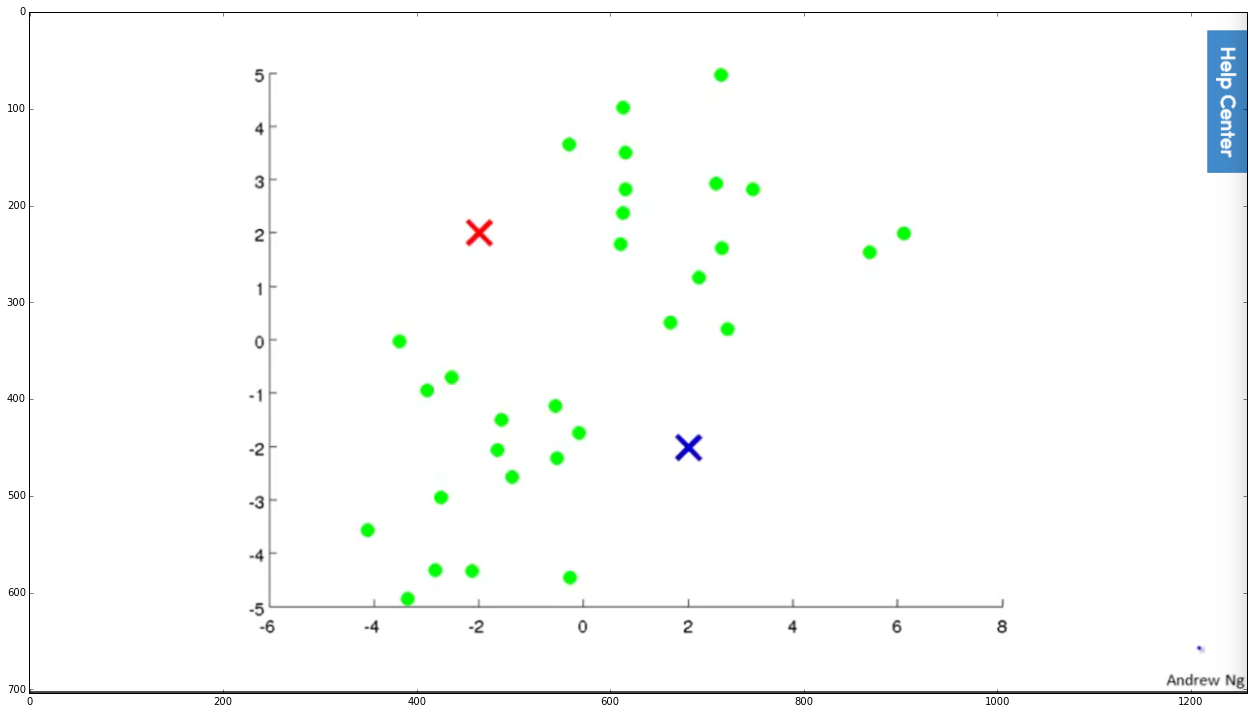

In [272]:
from scipy.misc import imread, imresize

img = imread('./assets/kmeansdata.png')
fig0, ax0 = plt.subplots(figsize=(18,10))
ax0.imshow(img)
plt.tight_layout()

### K-Means algorithm

Input:
- $K$ (number of clusters)
- Training set $\{x^{(1)}, x^{(2)}, ..., x^{(m)}\}$

$x^{(i)} \in \mathbb{R}^n$ (drop $x_0 = 1$ convention)

Randomly initialize K cluster centroids $\mu_1, \mu_2, ..., \mu_K \in \mathbb{R}^n $

Repeat {

    for $i$ = 1 to $m$
        c^{(i)} := index (from 1 to K) of cluster centroid closest to x^{(i)}
        
    for $k$ = 1 to $K$
        \mu_k := average (mean) of points assigned to cluster $k$

}

### K-means for non-separated clusters

For example, T-shirt sizing

Don't actually have clean clusters, but K-means might still cluster nicely.

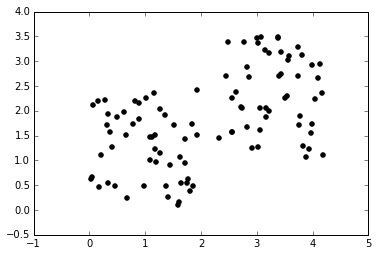

In [273]:
import matplotlib.cm as cm

m = 100
x_0_a = 2 * np.random.rand(1,m/2)
x_0_b = 2 * np.random.rand(1,m/2) + 2.3
x_0 = np.hstack((x_0_a, x_0_b))


x_1_a = 2.5 * np.random.rand(1,m/2)
x_1_b = 2.5 * np.random.rand(1,m/2) + 1
x_1 = np.hstack((x_1_a, x_1_b))


x = np.vstack(( x_0, x_1))

plt.scatter(x[0], x[1], color='black')
plt.show()


[[ 3.97028209  1.71934473  1.53640281]
 [ 2.70868723  2.32612646  1.62665242]]


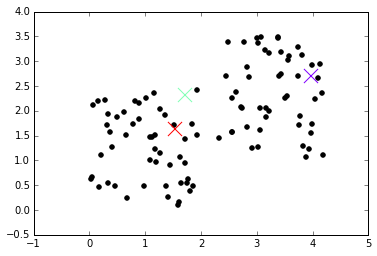

In [274]:
## K-Means implementation by Pete
from numpy import linalg as LA

K = 3    # Number of clusters


# Randomly initialize K cluster centroids
def randClusterCentroid(x):
    numdim = x.shape[0]
    centroidCoord = np.zeros(numdim)
    for i in range(numdim):
        xcenter = min(x[i]) + (max(x[i]) - min(x[i]))/2
        xrand = np.random.rand(1,1)[0][0] * (max(x[i]) - min(x[i])) - (max(x[i]) - min(x[i]))/2
        centroidCoord[i] = xcenter + xrand
    return centroidCoord

def KrandClusterCentroids(K,x):
    numdim = x.shape[0]
    centroidCoords = np.zeros((numdim,K))
    for i in range(K):
        centroidCoords[:,i] = randClusterCentroid(x)
    return centroidCoords

# init centroids
centroids = KrandClusterCentroids(K,x) # Each column is a centroid, each element in that column is an 
                                       # element of the centroid vector
    
print centroids

plt.scatter(x[0], x[1], color='black')

colors = cm.rainbow(np.linspace(0, 1, len(centroids[0])))
for centroid_0, centroid_1, Color in zip(centroids[0], centroids[1], colors):
    plt.scatter(centroid_0, centroid_1, color=Color, marker='x', s = 200)
    
plt.show()



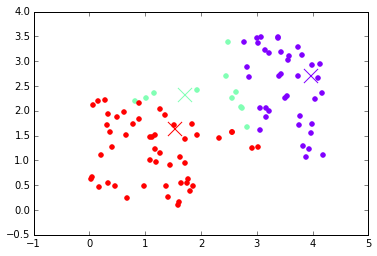

In [275]:
from scipy.spatial import distance


def closestCentroid(x_i, centroids):
    closest = 0
    mindistance = float("inf")
    for i in range(len(centroids[0])):
        dist = distance.euclidean(x_i,centroids[:,i]) 
        if dist < mindistance:
            mindistance = dist
            closest = i
    return closest

c = np.zeros(m)


for i in range(m):
     c[i] = closestCentroid(x[:,i], centroids)


colors = cm.rainbow(np.linspace(0, 1, len(centroids[0])))
for centroid_0, centroid_1, Color in zip(centroids[0], centroids[1], colors):
    plt.scatter(centroid_0, centroid_1, color=Color, marker='x', s = 200)
    
for x0, x1, c_closest in zip(x[0], x[1], c):
    plt.scatter(x0, x1, color=colors[c_closest])
    
plt.show()
    

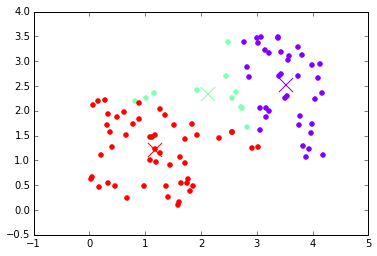

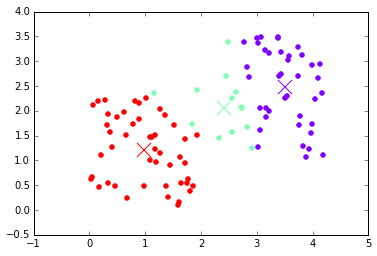

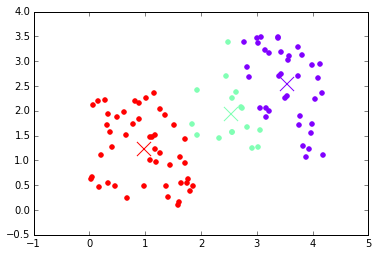

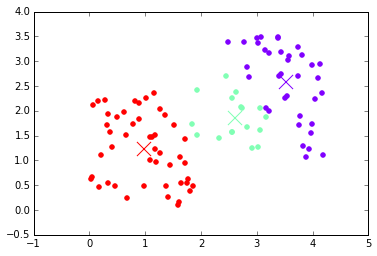

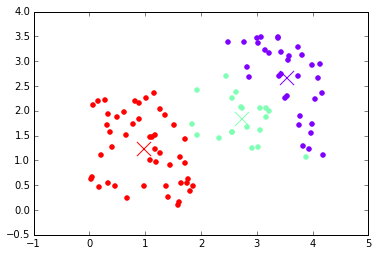

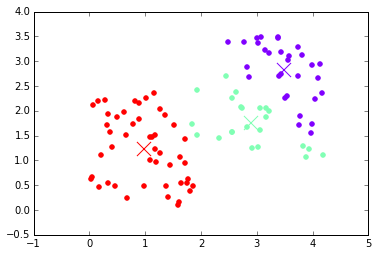

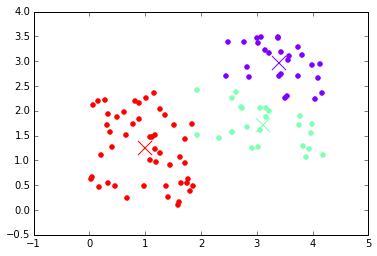

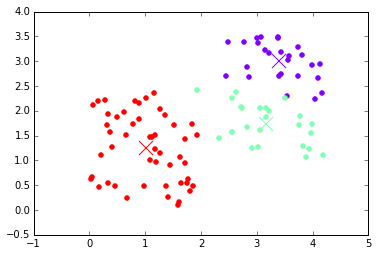

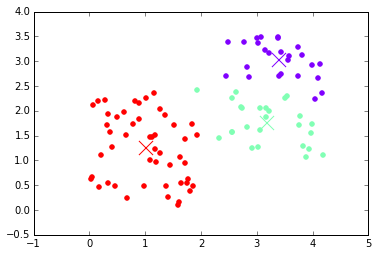

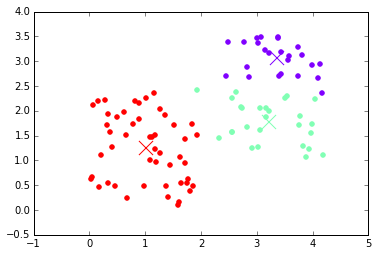

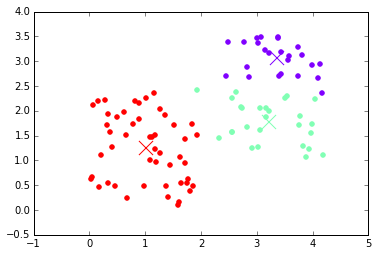

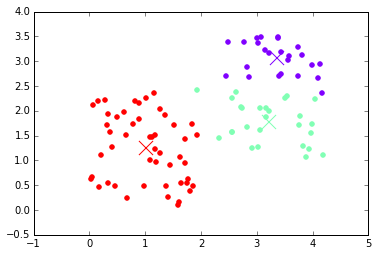

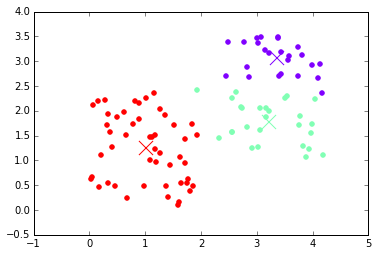

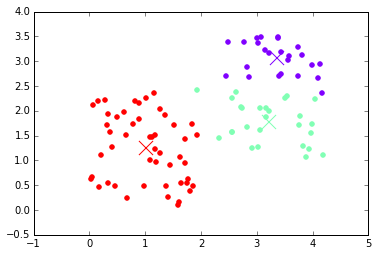

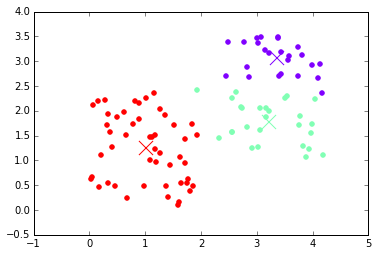

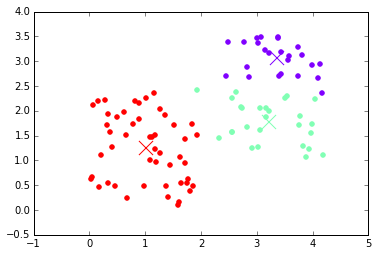

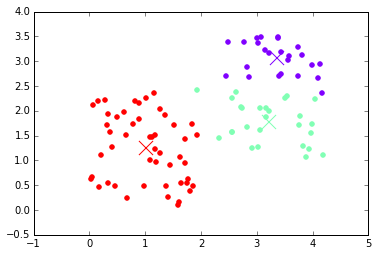

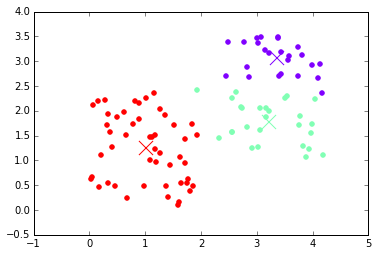

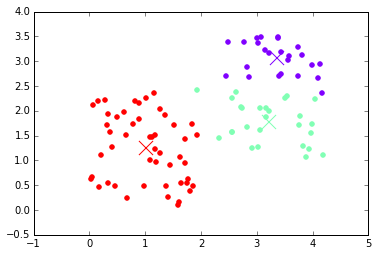

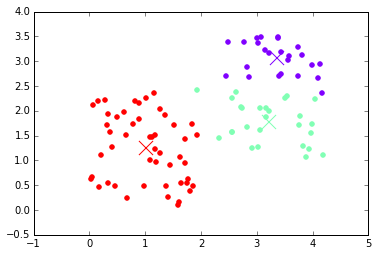

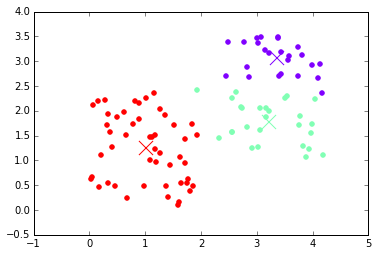

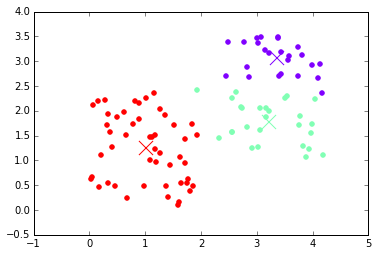

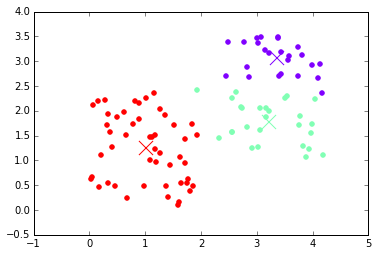

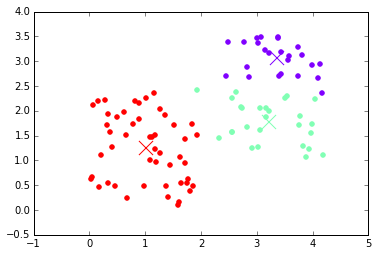

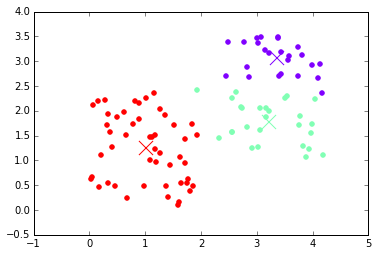

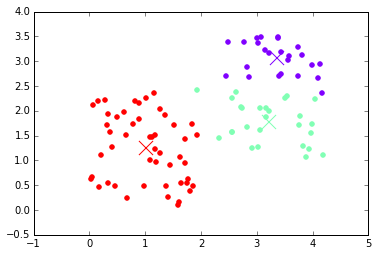

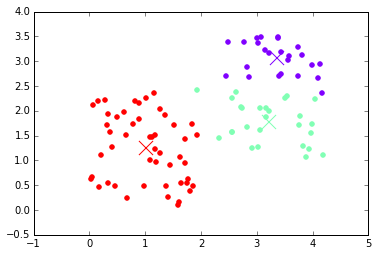

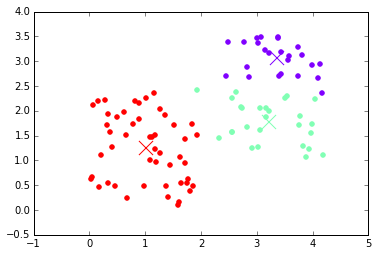

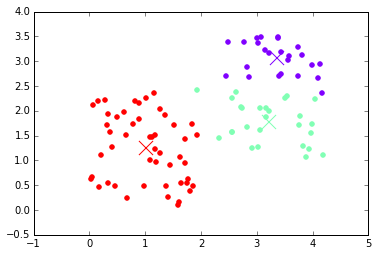

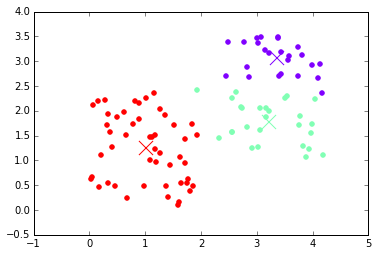

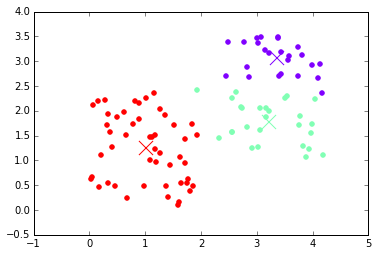

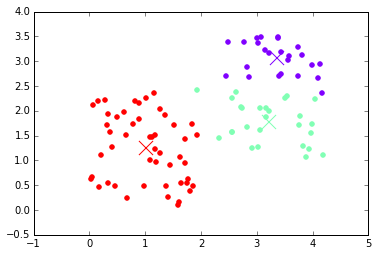

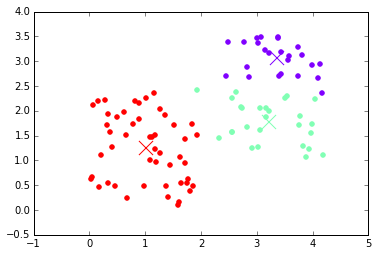

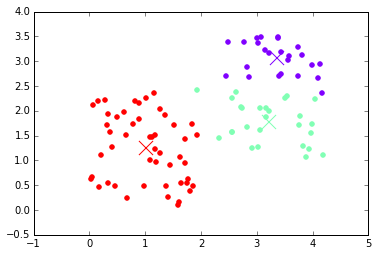

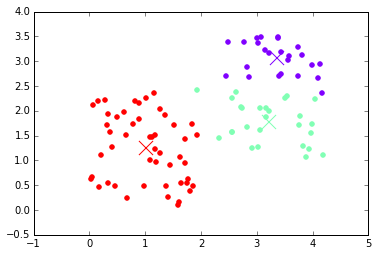

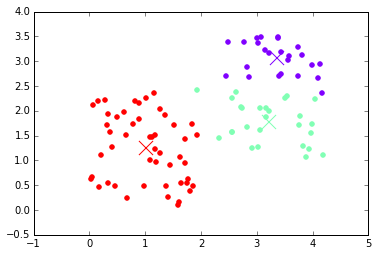

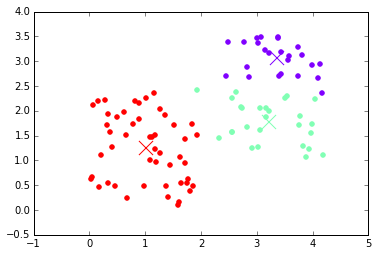

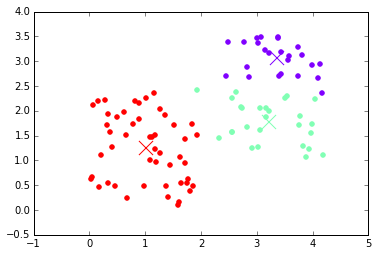

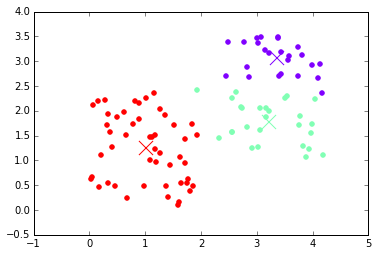

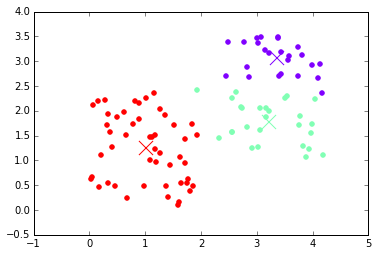

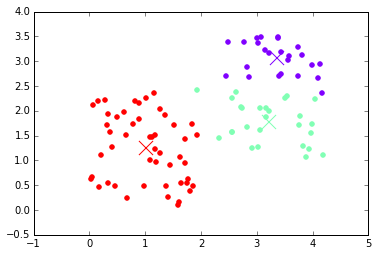

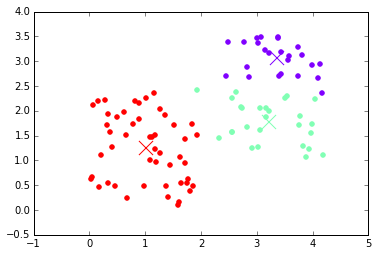

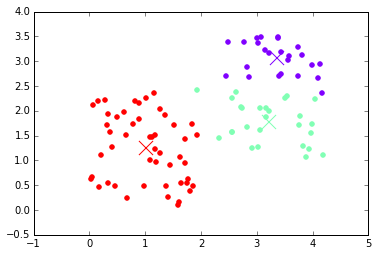

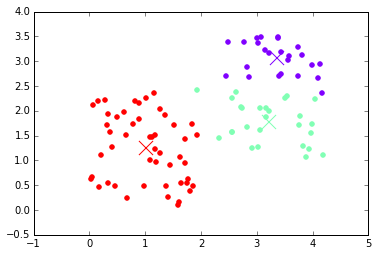

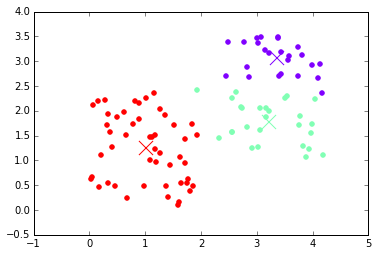

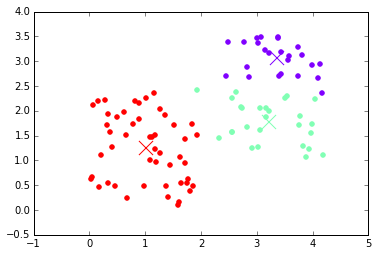

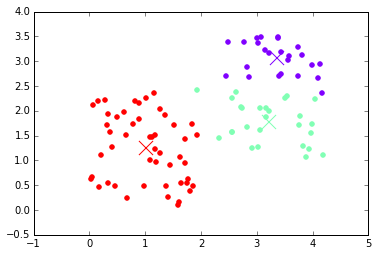

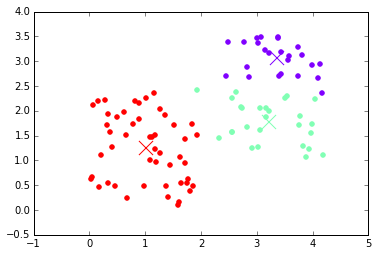

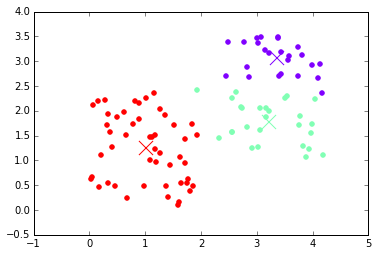

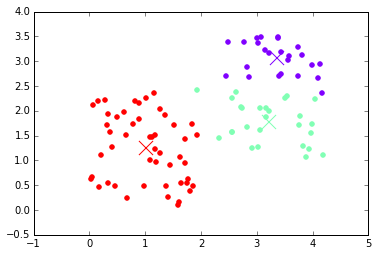

In [276]:
def meanCluster(x, c, K):    
    totals_this_cluster = np.zeros(x.shape[0])
    num_this_cluster = 0
    for i in range(m):
        if c[i] == k:
            totals_this_cluster = totals_this_cluster + x[:,i]
            num_this_cluster = num_this_cluster + 1
    means_this_cluster = totals_this_cluster / num_this_cluster
    return means_this_cluster


def KMeansCost(x,c,centroids):
    total = 0
    for i in range(m):
        eucNorm = LA.norm(x[:,i] - centroids[:,c[i]])
        normsquared = eucNorm**2
        total = total + normsquared
    return total/len(x[0])
        

    
num_iter = 50
iterations = np.arange(0, num_iter)
J = np.zeros(num_iter)

c = np.zeros(m)
for _iter in range(num_iter):
    for i in range(m):
        c[i] = closestCentroid(x[:,i], centroids)
    for k in range(K):
        centroids[:,k] = meanCluster(x, c, k)
    
    colors = cm.rainbow(np.linspace(0, 1, len(centroids[0])))
    for centroid_0, centroid_1, Color in zip(centroids[0], centroids[1], colors):
        plt.scatter(centroid_0, centroid_1, color=Color, marker='x', s = 200)
    
    for x0, x1, c_closest in zip(x[0], x[1], c):
        plt.scatter(x0, x1, color=colors[c_closest])
    
    J[_iter] = KMeansCost(x,c,centroids)
    
    plt.show()
    
    

        


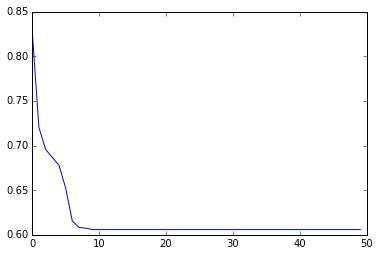

In [277]:
## Plot cost function as a function of iterations

plt.plot(iterations,J)
plt.show()

## Optimization objective

K-means also has an optimization objective

### K-means optimization objective

We have

$c^{(i)}$ = index of cluster (1,2,...,$K$) to which example $x^{(i)}$ is currently assigned

$\mu_k$ = cluster centroid $k$ (\mu_k \in \mathbb{R}^n)

$\mu_{c^{(i)}}$ = cluster centroid of cluster to which example $x^{(i)}$ has been assigned

Optimization objective:

$$J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_k) = \frac{1}{m} \sum_{i=1}^{m} ||x^{(i)} - \mu_{c^{(i)}}||^2 $$

K-means is doing:


### K-means algorithm

Randomly initialize $K$ cluster centroids $\mu_1, \mu_2, ..., \mu_K \in \mathbb{R}^n$

Repeat {

    for $i$ = 1 to $m$
        c^{(i)} := index (from 1 to K) of cluster centroid closest to x^{(i)}
        
    for $k$ = 1 to $K$
        \mu_k := average (mean) of points assigned to cluster $k$

}


## Random initialization

How to initialize k-means?  And should help us avoid local optima.

### Random initialization

Should have $K < m$

Randomly pick $K$ training examples

Set $\mu_1,...,\mu_K$ equal to these $K$ examples

### Local optima

Can get stuck in local optima of $J()$.

If you're worried about getting stuck in local optima, can run K-means lots of times.

Random initialization:

for i = 1 to 100{

Randomly initialize K-means
    
Run K-means.  Get $c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_K$
Compute cost function (distortion) J()
    
}

Pick clustering that gave the lowest cost J()

In [ ]:
# Need to go back and implement random initialization

## How to choose the number of clusters

### What is the right value of K?

Sometimes it is hard to know how many clusters there should be.

### Choosing the value of K

The elbow method:

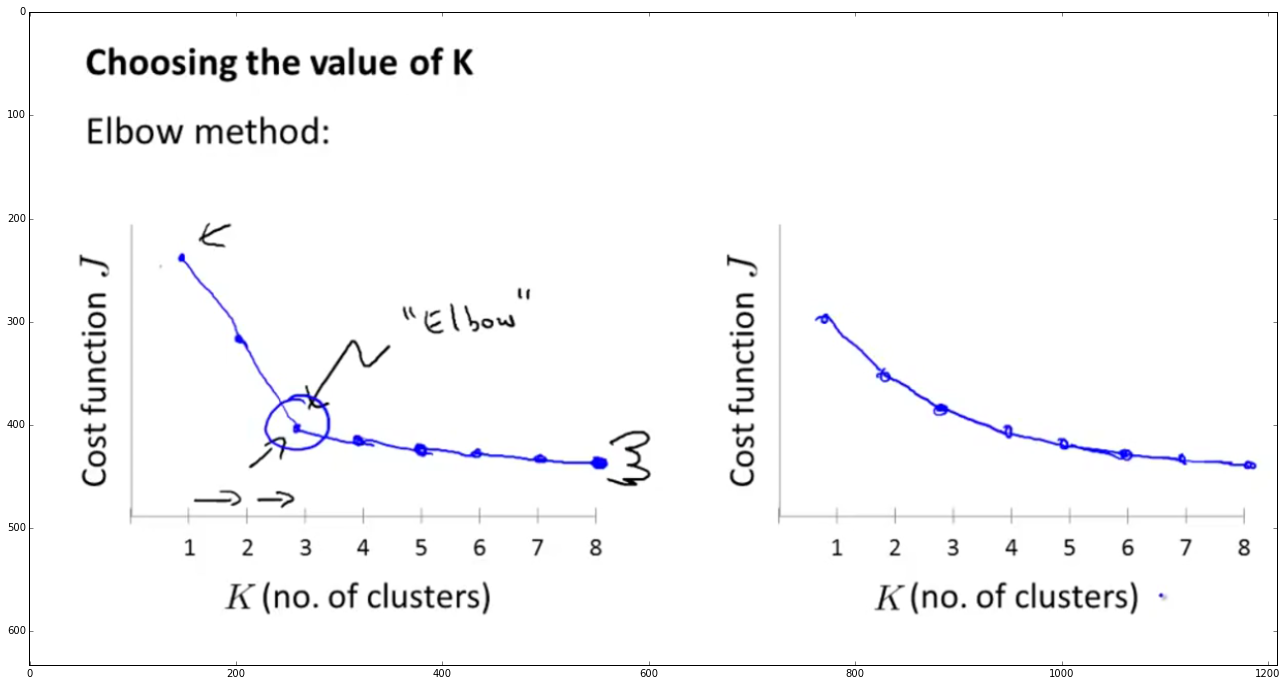

In [278]:
img = imread('./assets/elbowmethod.png')
fig0, ax0 = plt.subplots(figsize=(18,10))
ax0.imshow(img)
plt.tight_layout()

### Choosing the value of K

Often you're running K-means to get clusters to use for some later/downstream purpose.  Evaluate K-means based on a metric for how well it performs for that later purpose.

Number of clusters is still often chose by human input.